# Data Collection

In [3]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
university= pd.read_csv('World University Rankings 2023.csv')

In [5]:
university.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [26]:
university.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2312 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2073 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), object(7

# Data Cleaning

In [27]:
missing_values = university.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 University Rank                  0
Name of University              79
Location                       239
No of student                  103
No of student per staff        104
International Student          103
Female:Male Ratio              184
OverAll Score                  513
Teaching Score                 513
Research Score                 513
Citations Score                513
Industry Income Score          513
International Outlook Score    513
dtype: int64


In [29]:
university.dropna(inplace=True)

In [30]:
missing_values = university.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 University Rank                0
Name of University             0
Location                       0
No of student                  0
No of student per staff        0
International Student          0
Female:Male Ratio              0
OverAll Score                  0
Teaching Score                 0
Research Score                 0
Citations Score                0
Industry Income Score          0
International Outlook Score    0
dtype: int64


In [31]:
university.drop_duplicates(inplace=True)

In [36]:
university['Location'].value_counts()

Location
United States        166
Japan                112
United Kingdom        92
India                 65
Brazil                60
                    ... 
Costa Rica             1
Zambia                 1
Jamaica                1
Brunei Darussalam      1
Montenegro             1
Name: count, Length: 99, dtype: int64

C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


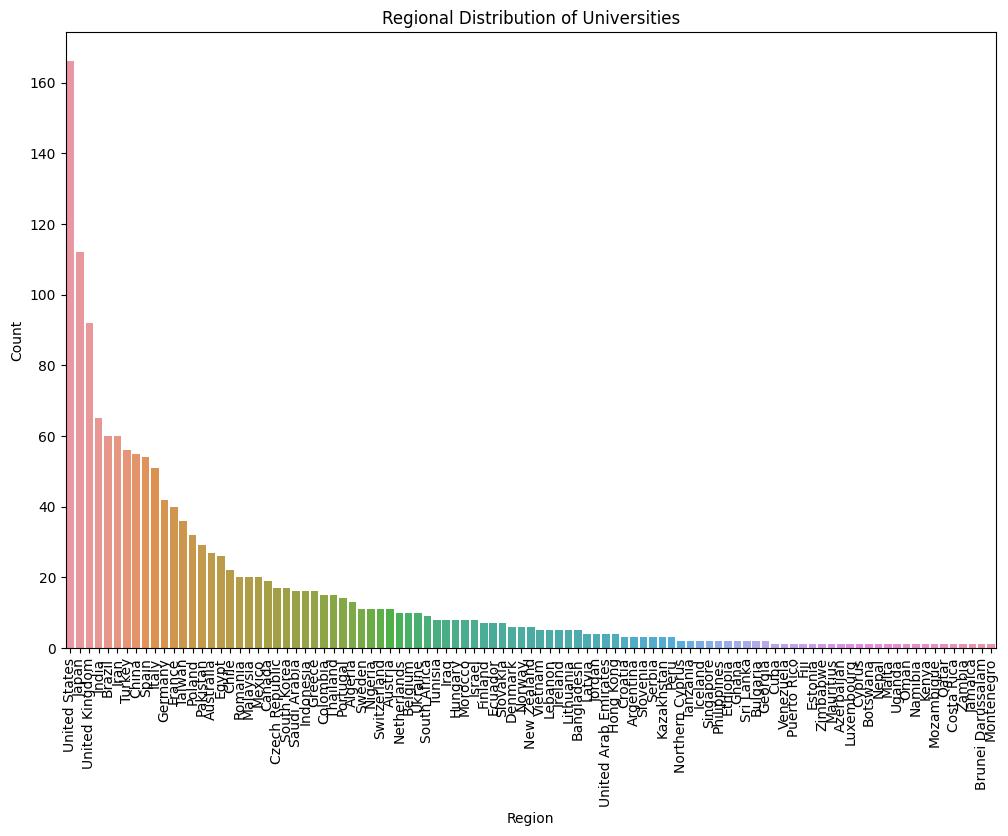

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(data=university, x='Location', order=university['Location'].value_counts().index)
plt.title('Regional Distribution of Universities')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [38]:
# Get the top ten countries with the most universities in the top 100
top_100= university.head(100)
countries = top_100['Location']

In [39]:
# Find rows with null values in the 'Location' column
null_locations = top_100[top_100['Location'].isnull()]

# Display the rows with null values
print(null_locations)

Empty DataFrame
Columns: [University Rank, Name of University, Location, No of student, No of student per staff, International Student, Female:Male Ratio, OverAll Score, Teaching Score, Research Score, Citations Score, Industry Income Score, International Outlook Score]
Index: []


In [40]:
#fill in the missing country data
universities_to_countries = {
    'Tsinghua University': 'China',
    'Peking University': 'China',
    'National University of Singapore': 'Singapore',
    'Technical University of Munich': 'Germany',
    'University of Hong Kong': 'Hong Kong',
    'LMU Munich': 'Germany',
    'KU Leuven': 'Belgium',
    'Universität Heidelberg': 'Germany',
    'Chinese University of Hong Kong': 'Hong Kong',
    'McGill University': 'Canada',
    'The University of Queensland': 'Australia',
    'University of Manchester': 'United Kingdom',
    'The Hong Kong University of Science and Technology': 'Hong Kong',
    'Zhejiang University': 'China',
    'UNSW Sydney': 'Australia',
    'University of Science and Technology of China': 'China',
    'University of Groningen': 'Netherlands',
    'University of Bristol': 'United Kingdom',
    'Leiden University': 'Netherlands',
    'Yonsei University (Seoul campus)': 'South Korea',
    'Hong Kong Polytechnic University': 'Hong Kong',
    'Erasmus University Rotterdam': 'Netherlands',
    'University of Glasgow': 'United Kingdom',
    'McMaster University': 'Canada',
    'University of Adelaide': 'Australia',
    'City University of Hong Kong': 'Hong Kong'
}

# Iterate through the universities and assign the corresponding country
for university_name, country in universities_to_countries.items():
    top_100.loc[top_100['Name of University'] == university_name, 'Location'] = country

# Data Analysis

In [41]:
# number of universities in each country
country_counts = countries.value_counts()

# top ten countries
top_ten_countries = country_counts.head(10)

print(top_ten_countries)

Location
United States     35
United Kingdom    12
Germany            9
Australia          7
Netherlands        7
Switzerland        5
Canada             4
France             4
China              3
Hong Kong          3
Name: count, dtype: int64


In [42]:
# Convert 'OverAll Score' column to float using .loc for assignment
top_100.loc[:, 'OverAll Score'] = top_100['OverAll Score'].astype(float)

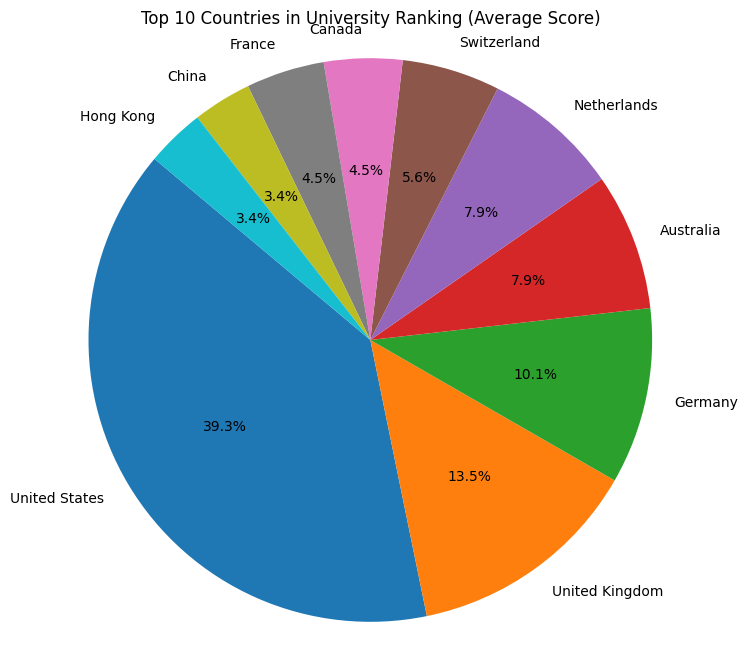

In [43]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_ten_countries, labels=top_ten_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries in University Ranking (Average Score)')
plt.axis('equal') 
# Show the pie chart
plt.show()

# Top 10 Countries and their Count of Universities in the top 100

C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


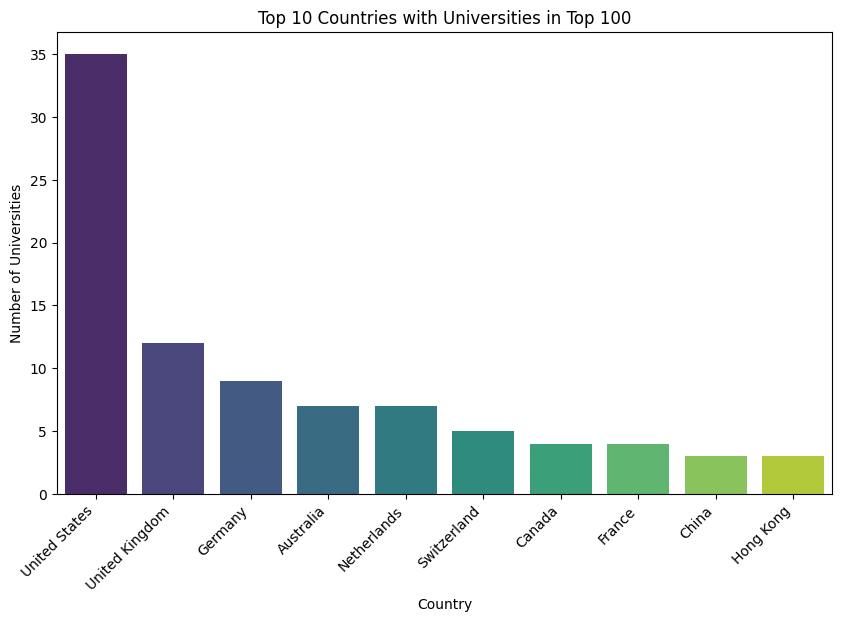

In [44]:
# top ten countries and their count of universities in the top 100
top_ten_countries_df = top_ten_countries.reset_index()

# Rename the columns 
top_ten_countries_df.columns = ['Country', 'University Count']

#create the barchart
plt.figure(figsize=(10, 6))
bar_chart = sns.barplot(x='Country', y='University Count', data=top_ten_countries_df, palette='viridis')
bar_chart.set_title('Top 10 Countries with Universities in Top 100')
bar_chart.set_xlabel('Country')
bar_chart.set_ylabel('Number of Universities')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


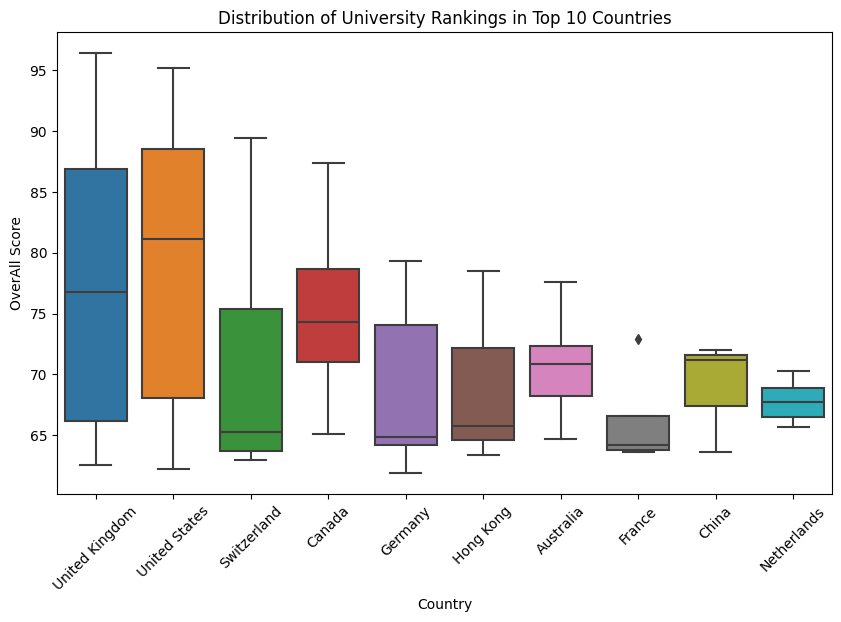

In [45]:
# Filter the data to include only the top 10 countries
filtered_data = top_100[top_100['Location'].isin(top_ten_countries.index)]

# Create a distribution box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='OverAll Score', data=filtered_data)
plt.title('Distribution of University Rankings in Top 10 Countries')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('OverAll Score')
plt.show()

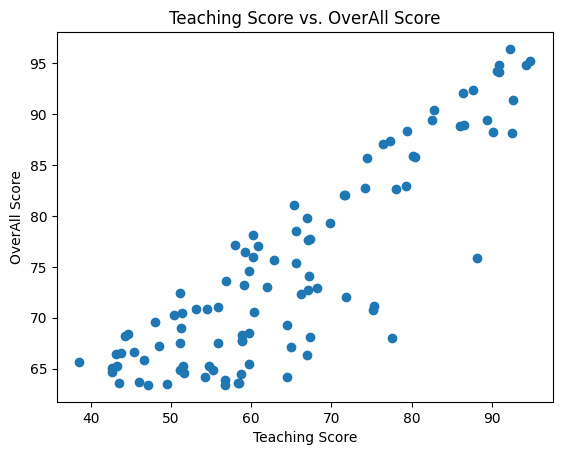

In [19]:
# Scatterplot for Teaching Score vs. OverAll Score
plt.scatter(top_100['Teaching Score'], top_100['OverAll Score'])
plt.title('Teaching Score vs. OverAll Score')
plt.xlabel('Teaching Score')
plt.ylabel('OverAll Score')
plt.show()







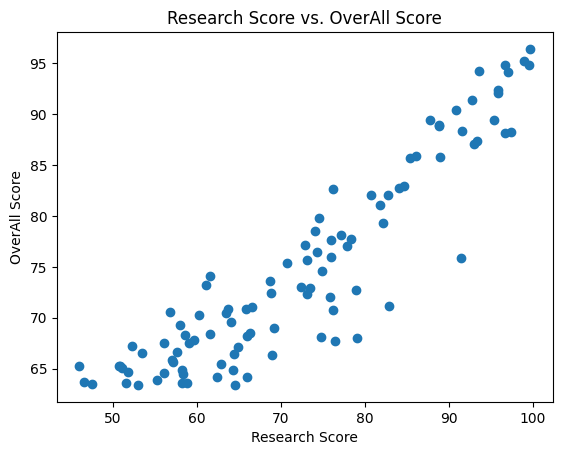

In [20]:
# Scatterplot for Research Score vs. OverAll Score
plt.scatter(top_100['Research Score'], top_100['OverAll Score'])
plt.title('Research Score vs. OverAll Score')
plt.xlabel('Research Score')
plt.ylabel('OverAll Score')
plt.show()

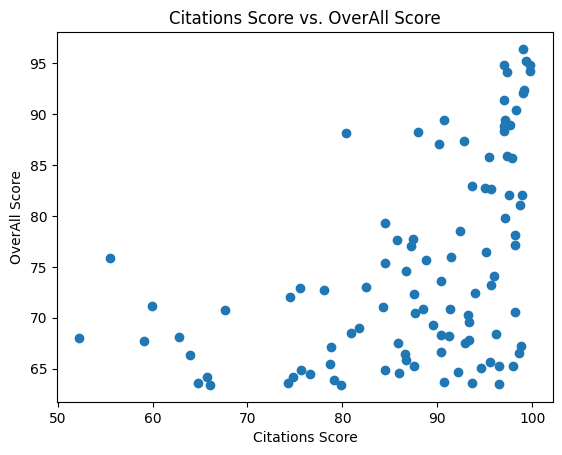

In [21]:
# Scatterplot for Citations Score vs. OverAll Score
plt.scatter(top_100['Citations Score'], top_100['OverAll Score'])
plt.title('Citations Score vs. OverAll Score')
plt.xlabel('Citations Score')
plt.ylabel('OverAll Score')
plt.show()



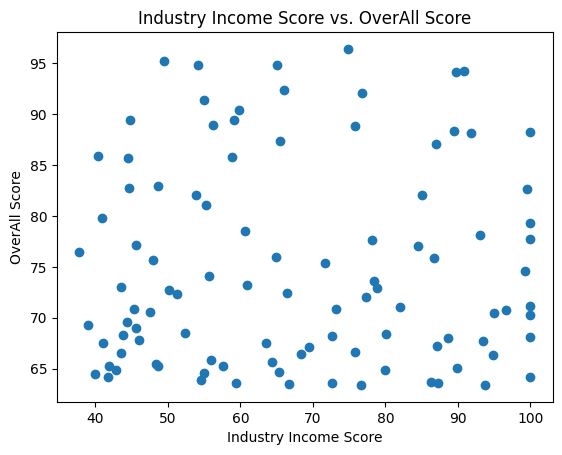

In [22]:
# Scatterplot for Industry Income Score vs. OverAll Score
plt.scatter(top_100['Industry Income Score'], top_100['OverAll Score'])
plt.title('Industry Income Score vs. OverAll Score')
plt.xlabel('Industry Income Score')
plt.ylabel('OverAll Score')
plt.show()

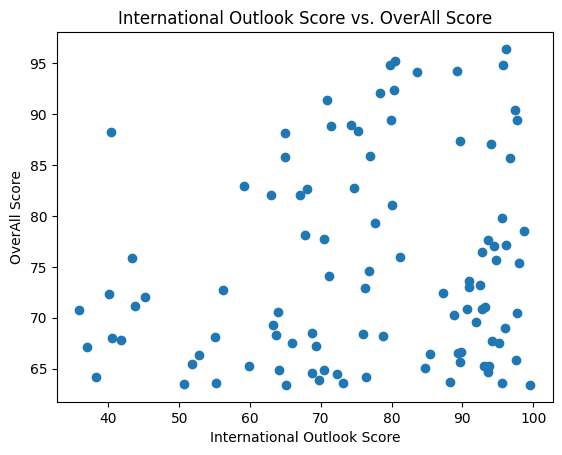

In [23]:
# Scatterplot for International Outlook Score vs. OverAll Score
plt.scatter(top_100['International Outlook Score'], top_100['OverAll Score'])
plt.title('International Outlook Score vs. OverAll Score')
plt.xlabel('International Outlook Score')
plt.ylabel('OverAll Score')
plt.show()

C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


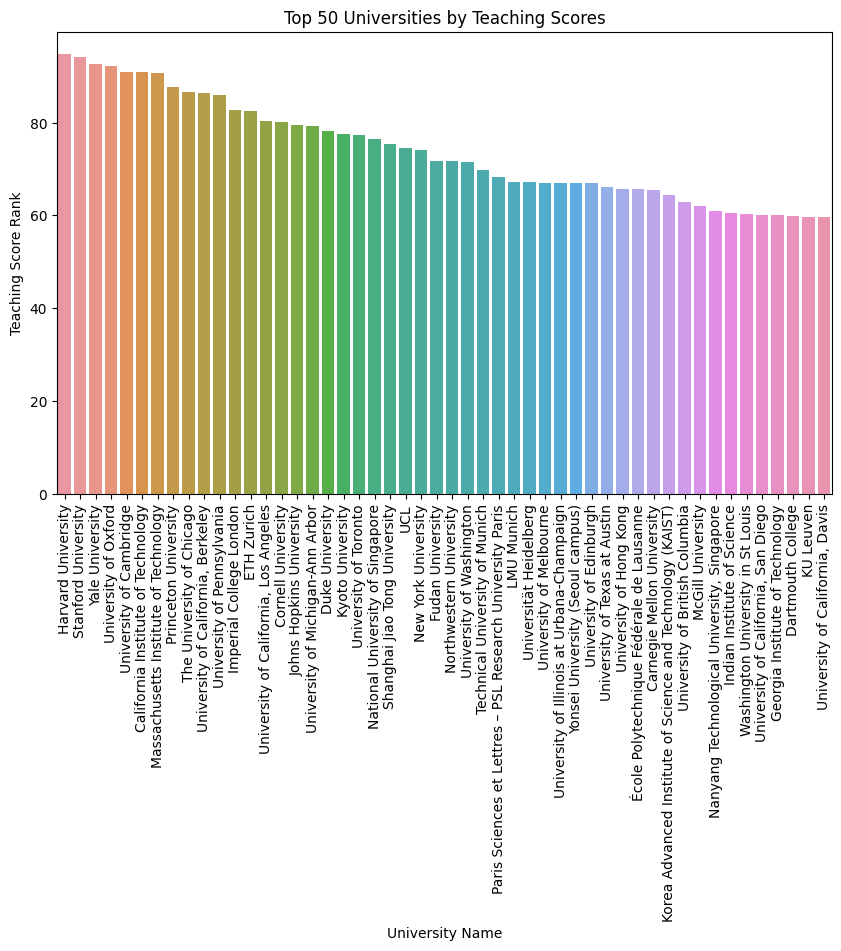

In [60]:
top_n = 50
top_scores_teaching_rank = university.nlargest(top_n, 'Teaching Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name of University', y='Teaching Score', data=top_scores_teaching_rank)
plt.title(f'Top {top_n} Universities by Teaching Scores')
plt.xlabel('University Name')
plt.xticks(rotation=90)
plt.ylabel('Teaching Score Rank')
plt.show()

C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


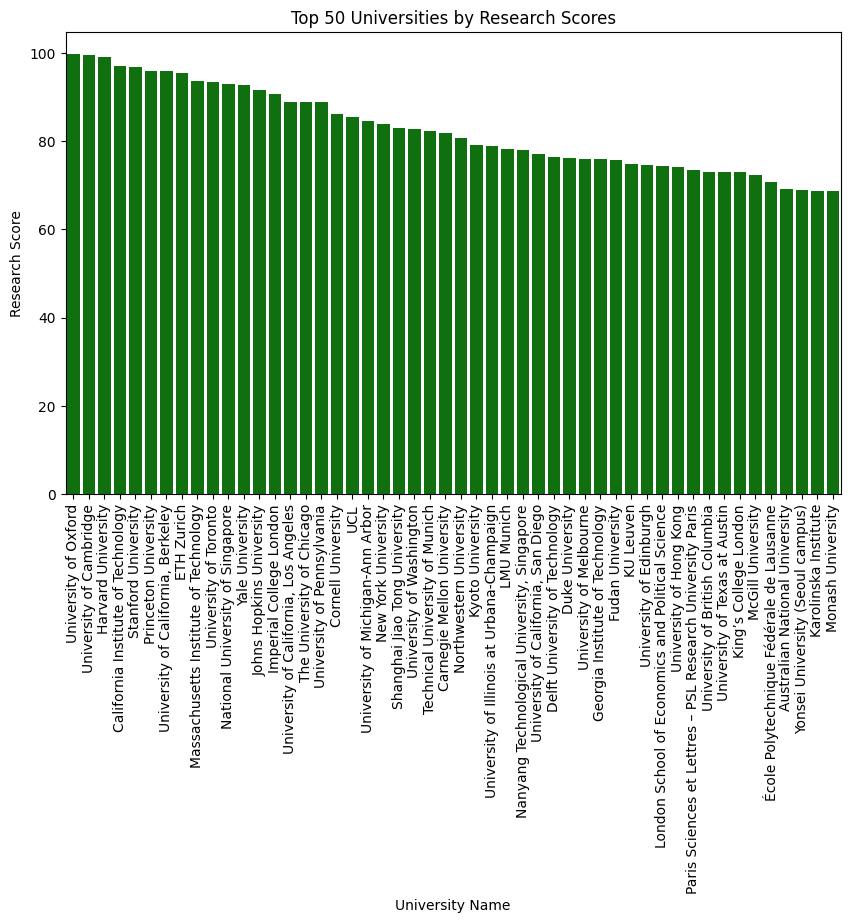

In [59]:
top_n = 50
top_scores_research_rank = university.nlargest(top_n, 'Research Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name of University', y='Research Score', data=top_scores_research_rank,  color='green')
plt.title(f'Top {top_n} Universities by Research Scores')
plt.xlabel('University Name')
plt.xticks(rotation=90)
plt.ylabel('Research Score')
plt.show()

C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mewho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


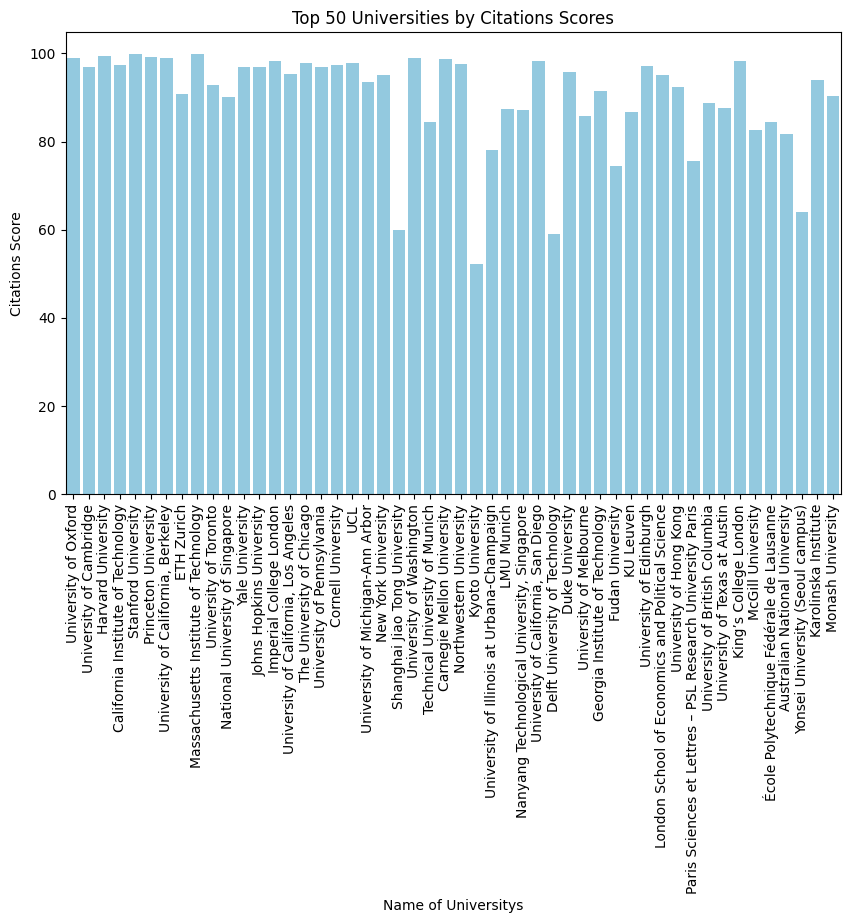

In [61]:
top_n = 50
top_scores_citation = university.nlargest(top_n, 'Citations Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name of University', y='Citations Score', data=top_scores_research_rank,  color='skyblue')
plt.title(f'Top {top_n} Universities by Citations Scores')
plt.xlabel('Name of Universitys')
plt.xticks(rotation=90)
plt.ylabel('Citations Score')
plt.show()